In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Multiple Linear Regression on the Auto data-set

In [155]:
df=pd.read_excel("C:/Users/I068117/UT_Machine Learning/Regression/Auto.xlsx")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Data Cleaning: Checking for null values & datatypes. 

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


Interpretation: We observe that column horsepower is an object. We look at the non-numeric rows and delete them from the data-set to clean the data

In [157]:
df=df.drop(df[pd.to_numeric(df['horsepower'],errors='coerce').isnull()].index, axis=0)
df['horsepower']=pd.to_numeric(df['horsepower'])

### Data Visualization:  scatterplot matrix that includes all of the variables in the data set.

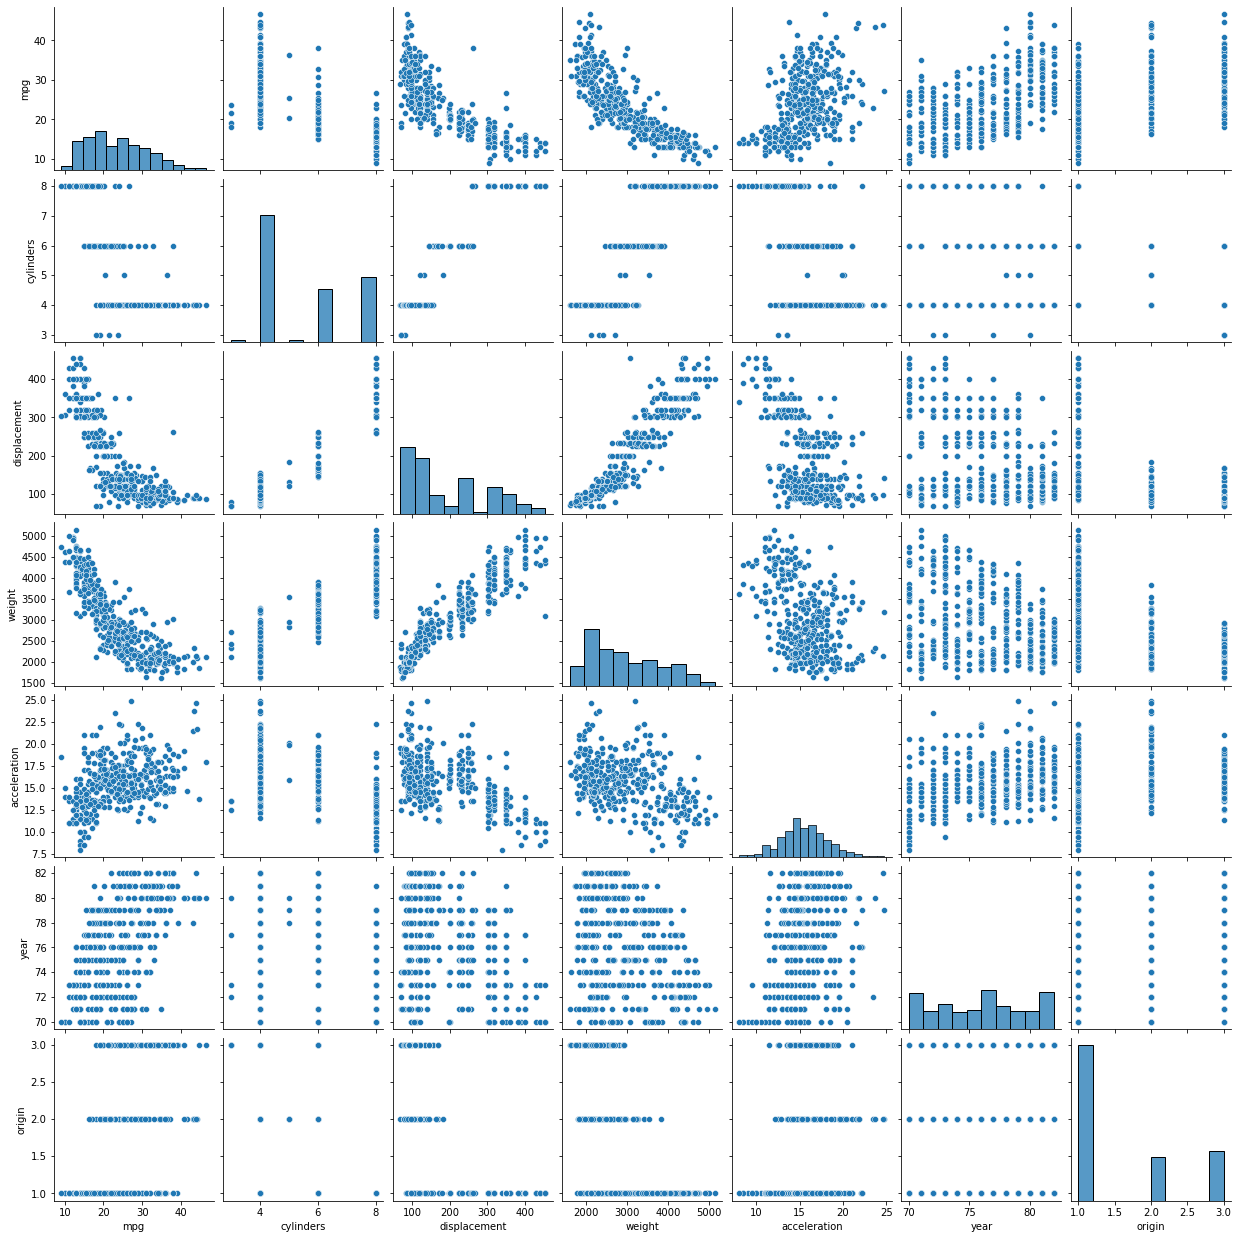

In [4]:
sns.pairplot(df)

Correlation between all numeric columns in the dataset

In [5]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


Interpretation: We see there is some linear relationship between mpg & other numeric variables. Hence, we try to fit in a linear model. However, we see there is also a correlation among different columns like weight & displacement. Going by the principle of Correlation is not causation, we need to control for variables to evaluate the causation effect of a specific feature column on mpg

### Fitting a MLR model to predict mpg on all numeric variables 

In [47]:
# Creating X with all numeric columns and Y as mpg column
X= df.drop(['mpg','name'],axis=1)
y= df['mpg']

In [48]:
#Splitting the data-set into test & train dataset to evaluate the model performance 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train,y_train)
lm.coef_

In [57]:
#Printing the stats summary of our MLR model
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     171.5
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.96e-92
Time:                        15:03:13   Log-Likelihood:                -689.32
No. Observations:                 262   AIC:                             1395.
Df Residuals:                     254   BIC:                             1423.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.6712      6.108     -2.566   

Interpretation: 
1. Our baseline for mpg is the constant -15.6712
2. With Pvalues <5%, we see weight, displacement**, year & origin are statistically significant. Since weight & displacement are highly corelated, if we control for weight, displacement is border-line statsitically significant. We can create a model keeping only weight, year & origin as feature selection based on statistical significance.
3. R2 is 83%, which means our model is able to explain 83% of the variance. 

### Evaluating the linear fit based on the residual plot. 

For linear model, we say our error follows a normal distribution, which means mean(error)=0 and there is no correlation between the error & the fitted values. If we plot the error & fitted Y predicted values, there should not be a pattern or association. 

In [64]:
Y_test_pred=lm.predict(X_test)

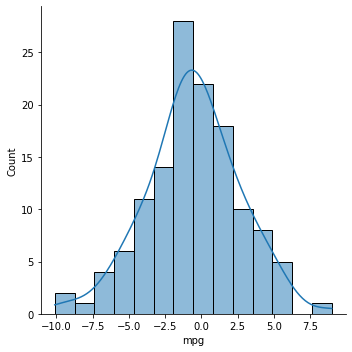

In [67]:
Y_test_residual=y_test - Y_test_pred
sns.displot(Y_test_residual, kde= True)

Interpretation: our residual error follows a normal distribution with 0 mean

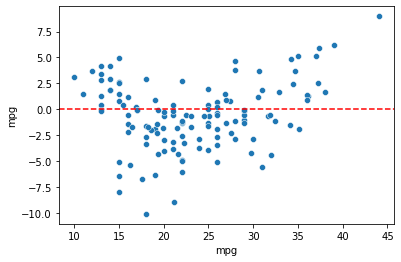

In [70]:
sns.scatterplot(x=y_test,y=Y_test_residual)
y_test.corr(Y_test_residual)
plt.axhline(y=0, color='r', linestyle='--')

Interpretation: We see a curved pattern and there is some correlation between Y_test & residual error. Hence Linear model may not be a good fit. 

### Calculating the RMSE of the model

In [72]:
#Evaluating the accuracy of our model
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(y_test,Y_test_pred)
RMSE=np.sqrt(MAE)
RMSE

3.2418403035673053

### Improving our model: Trying a new model based on feature selection 

In [125]:
# Creating X with statistically significant features based on our previous model - weight, year & origin and Y as mpg column
X= df[['weight','year','origin']]
y= df['mpg']

In [126]:
#Splitting the data-set into test & train dataset to evaluate the model performance 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lm = LinearRegression().fit(X_train,y_train)
lm.coef_

array([-0.00607235,  0.76637659,  1.46417237])

In [127]:
#Printing the stats summary of our MLR model
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     388.9
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           2.14e-95
Time:                        16:16:10   Log-Likelihood:                -694.08
No. Observations:                 262   AIC:                             1396.
Df Residuals:                     258   BIC:                             1410.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.8257      5.277     -3.567      0.0

In [128]:
Y_test_pred=lm.predict(X_test)

In [129]:
MAE=mean_squared_error(y_test,Y_test_pred)
RMSE=np.sqrt(MAE)
RMSE

3.1985691330474975

Residual plot

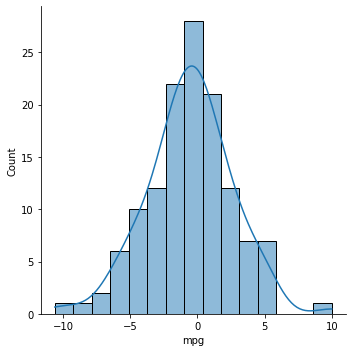

In [130]:
Y_test_residual=y_test - Y_test_pred
sns.displot(Y_test_residual, kde= True)

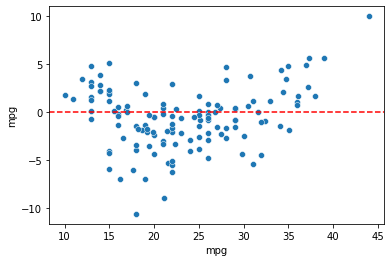

In [131]:
sns.scatterplot(x=y_test,y=Y_test_residual)
plt.axhline(y=0, color='r', linestyle='--')

Interpretation:
1. We are able to explain 82% of the variance in our model with just 3 features. We have reduced the complixity of our model using feature selection without affecting R2. Our RMSE is slightly reduced. So, this model is simpler than previous model with same RMSE
    

### Let's try to different interation terms/ polynomial model  to further reduce the RMSE

In [108]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train,y_train)
lm.coef_
#R2 score
lm.score(X_train,y_train)

0.8729862456827654

In [110]:
Y_test_pred=lm.predict(X_test)
MAE=mean_squared_error(y_test,Y_test_pred)
RMSE=np.sqrt(MAE)
RMSE

2.9387907123007326

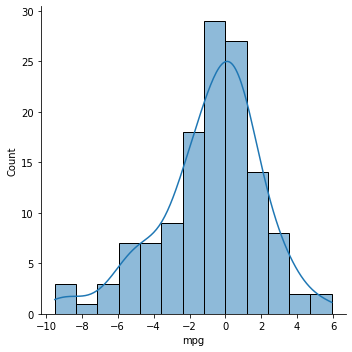

In [111]:
Y_test_residual=y_test - Y_test_pred
sns.displot(Y_test_residual, kde= True)

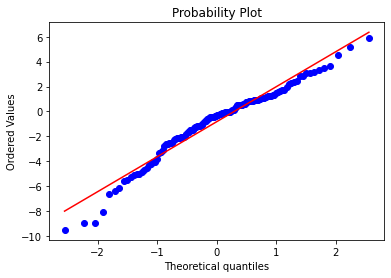

In [114]:
fig = plt.figure()
res = stats.probplot(Y_test_residual, plot=plt)

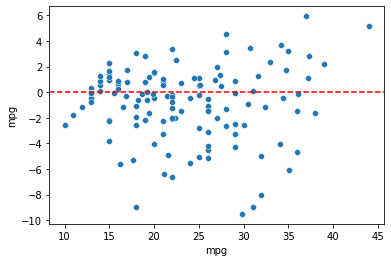

In [112]:
sns.scatterplot(x=y_test,y=Y_test_residual)
y_test.corr(Y_test_residual)
plt.axhline(y=0, color='r', linestyle='--')

Interpretation: RMSE is reduced to 2.9. This model satisfies the Linear model assumption. Residual mean is 0 & there is no pattern obsered

### Exploring Linear regression with different transformation for weight

In [159]:
X= np.log(df[['weight','year','origin']])
y= df['mpg']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lm = LinearRegression().fit(X_train,y_train)

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     463.6
Date:                Tue, 26 Dec 2023   Prob (F-statistic):          1.42e-103
Time:                        17:26:00   Log-Likelihood:                -674.94
No. Observations:                 262   AIC:                             1358.
Df Residuals:                     258   BIC:                             1372.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -82.9979     22.346     -3.714      0.0

In [161]:
Y_test_pred=lm.predict(X_test)
MAE=mean_squared_error(y_test,Y_test_pred)
RMSE=np.sqrt(MAE)
RMSE

3.060571168606525

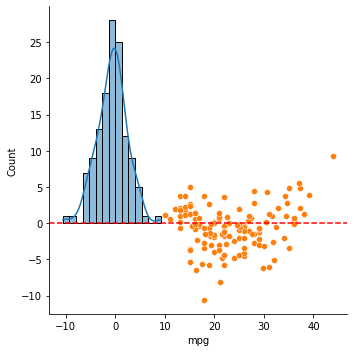

In [162]:
Y_test_residual=y_test - Y_test_pred
sns.displot(Y_test_residual, kde= True)
sns.scatterplot(x=y_test,y=Y_test_residual)
plt.axhline(y=0, color='r', linestyle='--')